In [34]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

# Summary

By the end of this chapter, we're going to have downloaded all of Canada's weather data for 2012, and saved it to a CSV. 

We'll do this by downloading it one month at a time, and then combining all the months together.

Here's the temperature every hour for 2012!

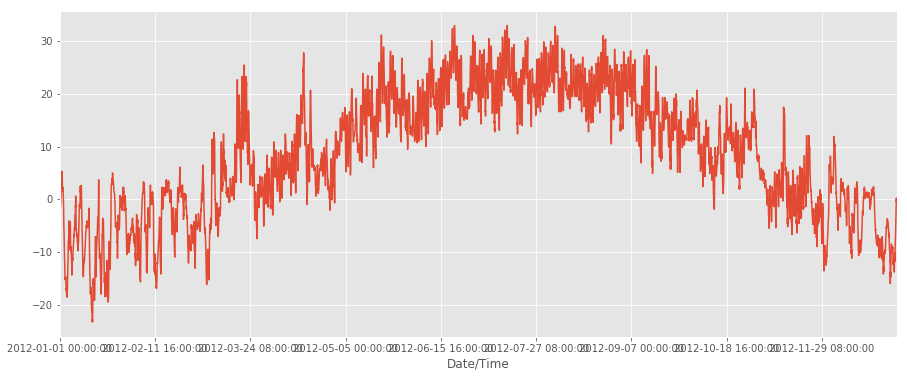

In [36]:
weather_2012_final = pd.read_csv('data/weather_2012.csv', index_col='Date/Time')
weather_2012_final['Temp (C)'].plot(figsize=(15, 6))

In [37]:
weather_2012_final

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog


In [38]:
weather_2012_final.index.values

array(['2012-01-01 00:00:00', '2012-01-01 01:00:00', '2012-01-01 02:00:00',
       ..., '2012-12-31 21:00:00', '2012-12-31 22:00:00',
       '2012-12-31 23:00:00'], dtype=object)

In [39]:
weather_2012_final = weather_2012_final.dropna(axis=1, how='any')

from datetime import datetime

datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

def getHours(row):
    datetime_object = row.name
    datetime_object = datetime.strptime(row.name, '%Y-%m-%d %H:%M:%S')
    return datetime_object.hour

weather_2012_final['Hour'] = weather_2012_final.apply(getHours, axis=1)

weather_2012_final[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Hour
Date/Time,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,0
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",3
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,4


# Plotting the temperature by hour of day

This one's just for fun -- we've already done this before, using groupby and aggregate! We will learn whether or not it gets colder at night. Well, obviously. But let's do it anyway.

<bound method DataFrame.head of                      Temp (C)  Hour
Date/Time                          
2012-01-01 00:00:00      -1.8     0
2012-01-01 01:00:00      -1.8     1
2012-01-01 02:00:00      -1.8     2
2012-01-01 03:00:00      -1.5     3
2012-01-01 04:00:00      -1.5     4
2012-01-01 05:00:00      -1.4     5
2012-01-01 06:00:00      -1.5     6
2012-01-01 07:00:00      -1.4     7
2012-01-01 08:00:00      -1.4     8
2012-01-01 09:00:00      -1.3     9
2012-01-01 10:00:00      -1.0    10
2012-01-01 11:00:00      -0.5    11
2012-01-01 12:00:00      -0.2    12
2012-01-01 13:00:00       0.2    13
2012-01-01 14:00:00       0.8    14
2012-01-01 15:00:00       1.8    15
2012-01-01 16:00:00       2.6    16
2012-01-01 17:00:00       3.0    17
2012-01-01 18:00:00       3.8    18
2012-01-01 19:00:00       3.1    19
2012-01-01 20:00:00       3.2    20
2012-01-01 21:00:00       4.0    21
2012-01-01 22:00:00       4.4    22
2012-01-01 23:00:00       5.3    23
2012-01-02 00:00:00       5.2   

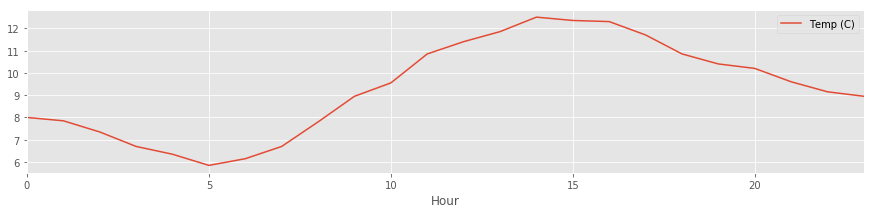

In [40]:
temperatures = weather_2012_final[['Temp (C)', 'Hour']].copy()
print(temperatures.head)
temperatures.groupby('Hour').aggregate(np.median).plot()

So it looks like the time with the highest median temperature is 2pm. Neat.

# Saving to a CSV

It's slow and unnecessary to download the data every time, so let's save our dataframe for later use!

In [41]:
temperatures.to_csv('data/hourly_temp.csv')

And we're done!